# Vyhodnotenie dopadov redukcie použitej sady pravidiel na analytikov

## Úvod
V rámci testovania diplomovej práce sme vykonali aj experimenty zamerané na overenie dopadov redukcie počtu vygenerovaných upozornení na rýchlosť s akou budú bezpečnostný analytici schopný zodpovedať otázky týkajúce sa škodlivej aktivity, ktorú v sieti zaznamenal systém IDS.

### Vykonané experimenty
Analytikov sme rozdeli do dvoch skupín po 4. Obe skupiny mali za úlohu vyplniť CTF cvičenie v rámci modulu ADS vo webovom rozhraní Flowmon Collectoru resp. zodpovedať 25 otázok o škodlivej aktivite v sieti na základe vygenerovaných upozornení systémom IDS. Pričom prvá skupina analytikov mala k dispozícií celkovo __7074__ upozornení vygenerovaných na základe vyhodnocovanie sieťovej premávky s datasetu CIC_IDS_2017 voči základnej sade pravidiel využívanej na Flowmon Collectore zo sady pravidiel ET/Open. Druhá skupina analytikov mala k dispozícií __2112__ upozornení vygenerovaným systémom IDS pri použití redukovanej detekčnej sady pravidiel. Sada pravidiel bola redukovaná o pravidlá, ktoré podľa nášho názoru na základe ich metadátových atribútov produkovali upozornenia, ktoré boli z bezpečnostného hľadiska irelevantné alebo mali len nízku závažnosť. Prehľad použitého súboru na deaktiváciu pravidiel pri základnom nastavení ako aj našom redukovanom nasadení (disable.conf) sa nachádza v tomto repozitári.

Cieľom experimentu bolo overiť či deaktivácia pravidiel produkujúcich upozornenia s nízkou bezpečnostnou závažnosťou resp. nízkou pridanou informačnou hodnotou pre bezpečnostných analytikov riešiacich CTF cvičenie prispeje k redukcii "šumu" medzi upozorneniami, ktoré musia bezpečnostný analytici preskúmať a umožní im rýchlejšie zodpovedať otázky týkajúce sa škodlivej aktivity v sieti. Preto sme okrem odpovedí a vyhodnotenia ich správnosti monitorovali aj čas potrebný na zodpovedanie otázok z jednotlivých scenárov a ich koreláciu medzi počtom upozornení, ktoré museli bezpečnostný analytici preskúmať. 

### Spracovanie dát

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
cmap = plt.get_cmap('YlOrRd')  # Orange to red
cmap_green = plt.get_cmap('Greens')  # Light green to green
#Meassured data from experiments
# Time to finish the CTF for four analysts in seconds
original_ruleset_time = [1993, 2540, 1820, 1880]
original_monday_time = [420,360,300,180]

original_tuesday_time = [360, 300, 240, 420]
original_wednesday_time = [360, 600, 420, 360]
original_thursday_time = [600, 960, 540, 600]
original_friday_time = [240, 300, 240, 300]
# Questions asnwer success rate
original_ruleset_answers_success_rate = [24/25, 24/25, 25/25, 24/25]
# Number of alert generated on given day (Monday - Friday)
original_ruleset_alerts = [4239, 1997, 237, 396, 205]

reduced_ruleset_time = [1642, 780, 967, 1164]
reduced_monday_time = [360, 300, 120, 120]

reduced_tuesday_time = [180, 180, 120, 180]
reduced_wednesday_time = [300, 240, 240, 120]
reduced_thursday_time = [540, 540, 360, 420]
reduced_friday_time = [240, 180, 120, 180]

reduced_ruleset_answers_success_rate = [24/25, 25/25, 25/25, 25/25]
reduced_ruleset_alerts = [19, 1923, 17, 82, 71]

### Vyhodnotenie redukcie počtu vygenerovaných upozornení



Celkový počet vygenerovaných upozornení - Pôvodná sada pravidiel: 7074
Celkový počet vygenerovaných upozornení - Redukovaná sada pravidiel: 2112
Celková redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre: 4962
Celková redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre (relatívna): 70.14 %
Priemerná redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre: 992.4





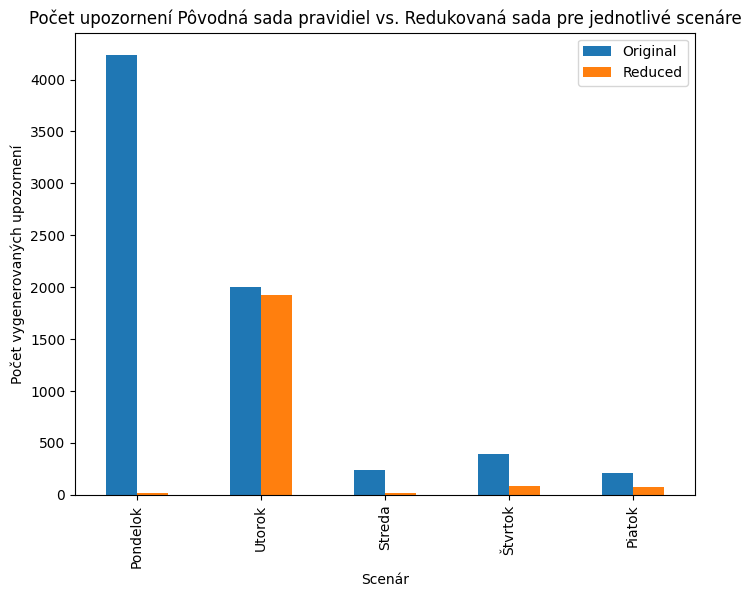

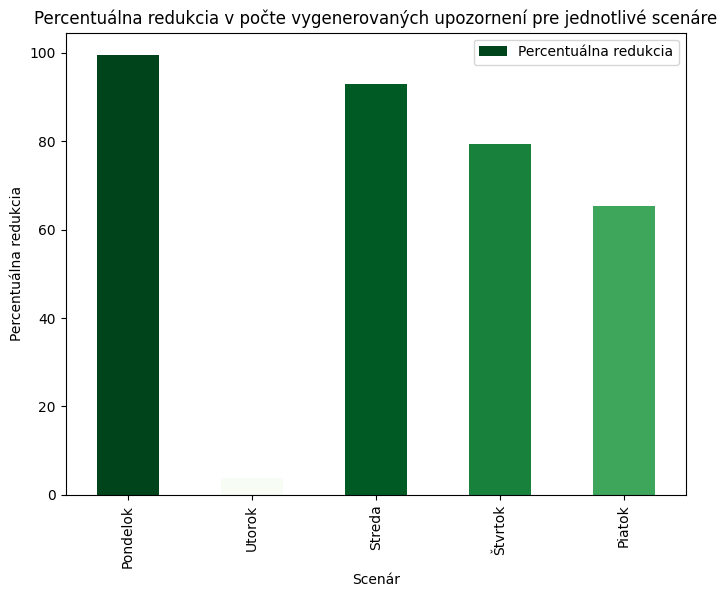

In [98]:
# Create a DataFrame to hold the data
alert_data = pd.DataFrame({
    'Scenario': ['Pondelok', 'Utorok', 'Streda', 'Štvrtok', 'Piatok'],
    'Original': original_ruleset_alerts,
    'Reduced': reduced_ruleset_alerts
})

df = pd.DataFrame(alert_data)

# Calculate the alert reduction for each task
alert_data['Reduction'] = alert_data['Original'] - alert_data['Reduced']
alert_data['Percentuálna redukcia'] = (alert_data['Reduction'] / alert_data['Original']) * 100
norm = mcolors.Normalize(vmin=alert_data['Percentuálna redukcia'].min(), vmax=alert_data['Percentuálna redukcia'].max())
colors = [cmap_green(norm(pr)) for pr in alert_data['Percentuálna redukcia']]

# Total number of alerts in original and reduced
total_original = alert_data['Original'].sum()
total_reduced = alert_data['Reduced'].sum()

# Average reduction
average_reduction = alert_data['Reduction'].mean()

# Print the results
print(f"\n\nCelkový počet vygenerovaných upozornení - Pôvodná sada pravidiel: {total_original}")
print(f"Celkový počet vygenerovaných upozornení - Redukovaná sada pravidiel: {total_reduced}")
print(f"Celková redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre: {total_original-total_reduced}")
print(f"Celková redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre (relatívna): {((1-total_reduced/total_original)*100):.2f} %")
print(f"Priemerná redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre: {average_reduction}")
print("\n\n")

# Bar chart for original vs. reduced alerts
alert_data.plot(x='Scenario', y=['Original', 'Reduced'], kind='bar', figsize=(8, 6))
plt.title('Počet upozornení Pôvodná sada pravidiel vs. Redukovaná sada pre jednotlivé scenáre')
plt.xlabel('Scenár')
plt.ylabel('Počet vygenerovaných upozornení')
plt.show()

# Bar chart for percentage reduction with custom colors
alert_data.plot(x='Scenario', y='Percentuálna redukcia', kind='bar', color=colors, figsize=(8, 6))
plt.title('Percentuálna redukcia v počte vygenerovaných upozornení pre jednotlivé scenáre')
plt.xlabel('Scenár')
plt.ylabel('Percentuálna redukcia')
plt.show()

Ako možno vidieť z vizualizácii redukcia počtu aplikovaných pravidiel resp. najmä deaktívácia pravidiel produkujúcich upozornenia s nízkou bezpečnostnou závažnosť v rámci testovaného scenáru prispela k výraznej redukcii v počte vygenerovaných upozornení systémom IDS.

Celkovo sa znížil počet vygenerovaných upozornení o __4 962__ upozornení z pôvodných __7 7074__ upozornení na __2 112__ upozornení. V podstate vo všetkých scenároch došlo k výraznej relatívnej redukcii upozornení okrem scenáru utorok. Kde počet vygenerovaných upozornení ostal viac-menej nezmenený, avšak v tomto prípade bola veľká časť vygenerovaných upozornení rovanká a týkala sa upozornenia ohľadom škodlivého skenovania služby FTP. V tomto prípade teda nebolo ani možné počet týchto upozornení zredukovať vhodnou úpravou aplikovanej sady pravidiel, ale počet takto vygenrovaných upozornení by bolo možné zredukovať napríklad s využitím nastavenia threshold-u pre vybraný typ upozornenia.

### Vyhodnotenie dopadov redukcie počtu upozornení na čas potrebný analytikmi na zodpovedanie otázok

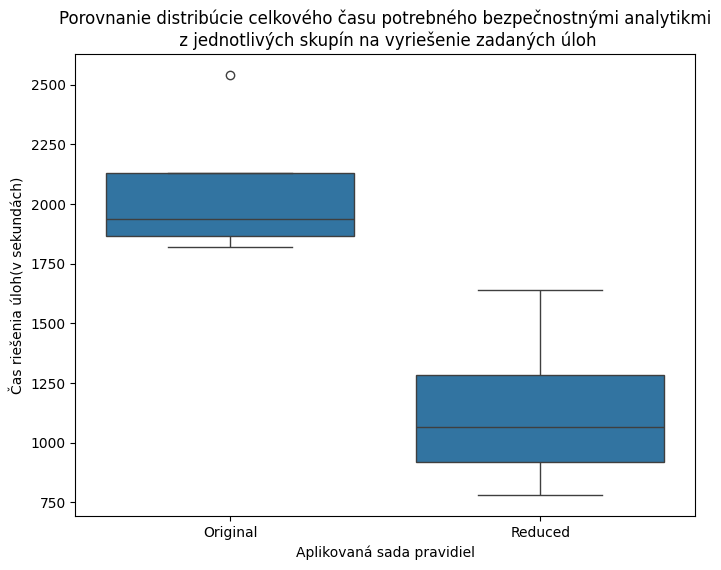

Redukcia času potrebného na vyriešenie úloh analytikmi (v sekundách) - Priemer: 920.0
Redukcia času potrebného na vyriešenie úloh analytikmi (v sekundách) - Median: 784.5
Redukcia času potrebného na vyriešenie úloh analytikmi (v sekundách) - Štandardná odchýľka: 598.74

Relatívna redukcia času potrebného na vyriešenie úloh analytikmi (v %) - Priemer: 42.96 %
nRelatívna redukcia času potrebného na vyriešenie úloh analytikmi (v %) - Median: 42.48 %
nRelatívna redukcia času potrebného na vyriešenie úloh analytikmi (v %) - Štandardná odchýľka: 21.41 %


In [99]:
original_time = original_ruleset_time
reduced_time = reduced_ruleset_time

time_data = pd.DataFrame({
    'Category': ['Original'] * len(original_time) + ['Reduced'] * len(reduced_time),
    'Time': original_time + reduced_time
})

# Box plot for original vs. reduced time
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='Time', data=time_data)
plt.title('Porovnanie distribúcie celkového času potrebného bezpečnostnými analytikmi\n z jednotlivých skupín na vyriešenie zadaných úloh')
plt.xlabel('Aplikovaná sada pravidiel')
plt.ylabel('Čas riešenia úloh(v sekundách)')
plt.show()
# Basic statistics for time reduction
time_reduction_mean = pd.Series(time_reduction).mean()
time_reduction_median = pd.Series(time_reduction).median()
time_reduction_std = pd.Series(time_reduction).std()

# Basic statistics for percentage reduction
percentage_reduction_mean = pd.Series(percentage_reduction).mean()
percentage_reduction_median = pd.Series(percentage_reduction).median()
percentage_reduction_std = pd.Series(percentage_reduction).std()

print("Redukcia času potrebného na vyriešenie úloh analytikmi (v sekundách) - Priemer:", time_reduction_mean)
print("Redukcia času potrebného na vyriešenie úloh analytikmi (v sekundách) - Median:", time_reduction_median)
print("Redukcia času potrebného na vyriešenie úloh analytikmi (v sekundách) - Štandardná odchýľka: {:.2f}".format( time_reduction_std))

print("\nRelatívna redukcia času potrebného na vyriešenie úloh analytikmi (v %) - Priemer: {:.2f} %".format( percentage_reduction_mean))
print("nRelatívna redukcia času potrebného na vyriešenie úloh analytikmi (v %) - Median: {:.2f} %".format( percentage_reduction_median))
print("nRelatívna redukcia času potrebného na vyriešenie úloh analytikmi (v %) - Štandardná odchýľka: {:.2f} %".format(percentage_reduction_std))




Cieľom tejto časti analýzi bolo porovnať ako ovplyvní redukcia počtu vygenerovaných upozornení analyzovaných analytikmi čas potrebný na vyriešenie úloh týkajúcich sa škodlivej aktivity v sieti monitorovanej systémom IDS týmito analytikmi. Ako možno vidieť z grafu distribúcie času potrebného na vyriešenie úloh jednolivými analytikmi, redukcia počtu upozornení mala za následok signifikantné zníženie času potrebného na zodpovedania jednotlivých úloh v rámci CTF cvičenia analytikmi.

Celkovo sa priemerný čas potrebný na vyriešenie zadaných úloh v rámci CTF cvičenia znížil o 920 sekúnd (15 minút), čo predstavuje relatívnu úsporu na úrovni takmer 43%. Vzhľadom na fakt, že obe skupiny analytikov riešili totožné úlohy v totožnom prostredí a jediná odlišnosť bola v počte vygenerovaných upozornení predpokladáme, že redukcia počtu vygenerovaných upozornení má za následok redukciu v čase potrebného analytikmi na pochopenie charakteru škodlivej premávky v sieti a vyhodnotenie jej možných dopadov resp. v našom prípade vyriešenie zadaných úloh. 

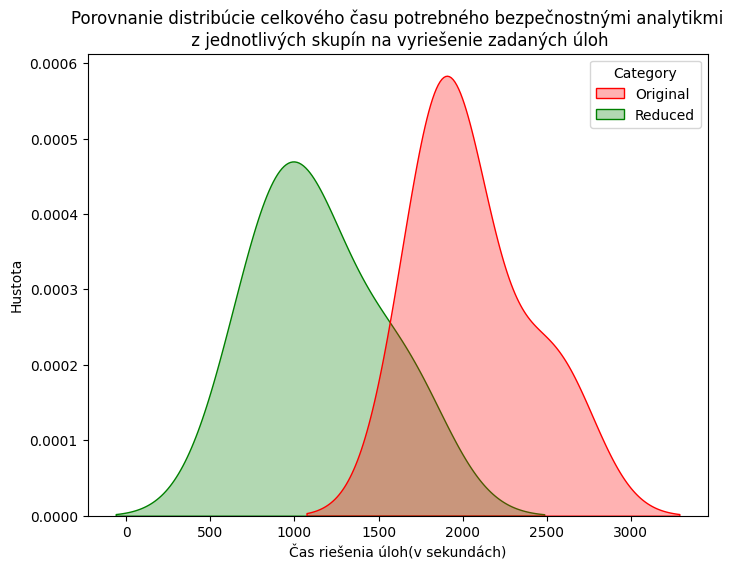

In [100]:
# Create a distribution plot with a custom color palette
palette = {'Original': 'red', 'Reduced': 'green'}
plt.figure(figsize=(8, 6))
sns.kdeplot(data=time_data, x='Time', hue='Category', fill=True, alpha=0.3, palette=palette)
plt.title('Porovnanie distribúcie celkového času potrebného bezpečnostnými analytikmi\n z jednotlivých skupín na vyriešenie zadaných úloh')
plt.xlabel('Čas riešenia úloh(v sekundách)')
plt.ylabel('Hustota')
plt.show()

### Vyhodnotenie časových dopadov pre jednotlivé scenáre

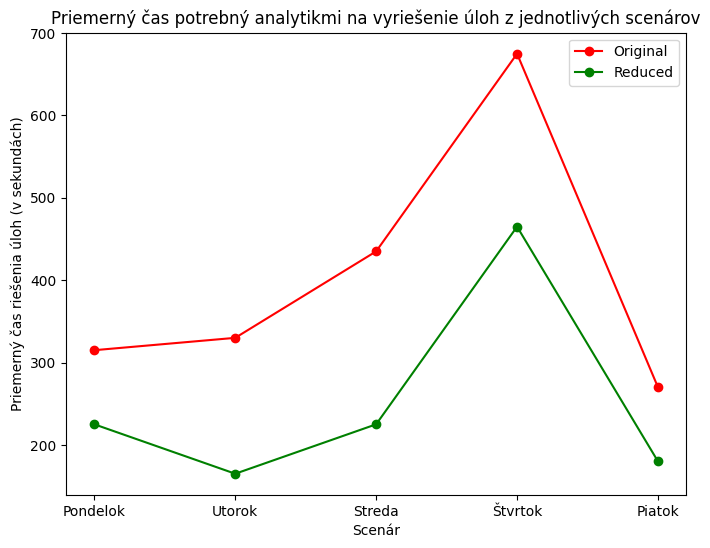

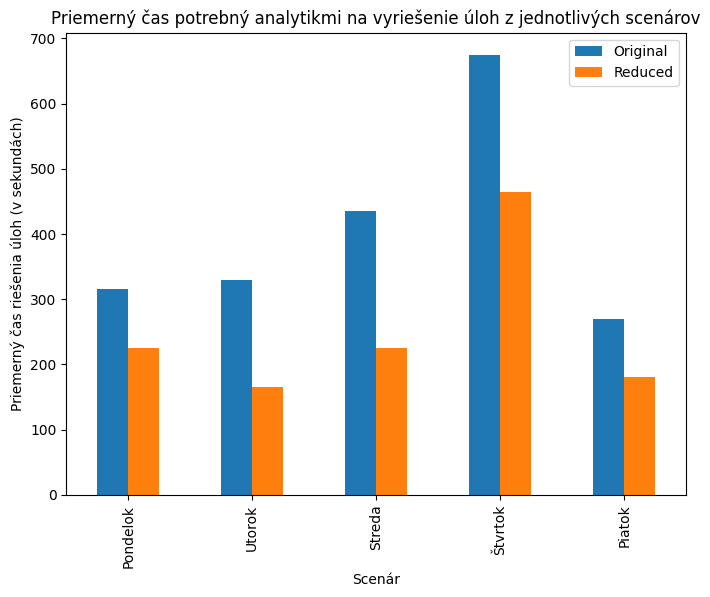

In [101]:
original_averages = {
    'Monday': np.mean(original_monday_time),
    'Tuesday': np.mean(original_tuesday_time),
    'Wednesday': np.mean(original_wednesday_time),
    'Thursday': np.mean(original_thursday_time),
    'Friday': np.mean(original_friday_time)
}

reduced_averages = {
    'Monday': np.mean(reduced_monday_time),
    'Tuesday': np.mean(reduced_tuesday_time),
    'Wednesday': np.mean(reduced_wednesday_time),
    'Thursday': np.mean(reduced_thursday_time),
    'Friday': np.mean(reduced_friday_time)
}

# Create a DataFrame to hold the average times
averages_data = pd.DataFrame({
    'Day': ['Pondelok', 'Utorok', 'Streda', 'Štvrtok', 'Piatok'],
    'Original': [
        original_averages['Monday'],
        original_averages['Tuesday'],
        original_averages['Wednesday'],
        original_averages['Thursday'],
        original_averages['Friday']
    ],
    'Reduced': [
        reduced_averages['Monday'],
        reduced_averages['Tuesday'],
        reduced_averages['Wednesday'],
        reduced_averages['Thursday'],
        reduced_averages['Friday']
    ]
})

plt.figure(figsize=(8, 6))
plt.plot(averages_data['Day'], averages_data['Original'], label='Original', marker='o', linestyle='-', color='red')
plt.plot(averages_data['Day'], averages_data['Reduced'], label='Reduced', marker='o', linestyle='-', color='green')

plt.title('Priemerný čas potrebný analytikmi na vyriešenie úloh z jednotlivých scenárov')
plt.xlabel('Scenár')
plt.ylabel('Priemerný čas riešenia úloh (v sekundách)')
plt.legend()
plt.show()

averages_data.plot(x='Day', y=['Original', 'Reduced'], kind='bar', figsize=(8, 6))
plt.title('Priemerný čas potrebný analytikmi na vyriešenie úloh z jednotlivých scenárov')
plt.xlabel('Scenár')
plt.ylabel('Priemerný čas riešenia úloh (v sekundách)')
plt.show()

Ako možno vidieť z vizualizácie priemerných časov potrebných na vyriešenie úloh z vytvorených scenárov v jednoltivých skupinách analytikov má redukcia v počte vygenerovaných upozornení v podstate rovnomerný vplyv na redukciu času potrebného na vyriešenie zadaných úloh. Pričom ako vyplíva z vizualizácie relatívna časová náročnosť vyriešenia úloh z jednotlivých scenárov ostala nezmenená. 

Preto možno opäť predpokladať, že redukcia počtu vygenerovaných upozornení odstránením z bezpečnostného hľadiska irelevantných upozornení resp. "šumu" vo vygenerovaných upozorneniach umožňuje bezpečnostným analytikom rýchlejšie identifikovať škodlivú aktivitu v sieti a vyhodnotiť jej dopady bez ohľadu na typ škodlivej aktivity resp. charakter sledovaných sieťových útokov. 

### Porovnanie úspešnosti analytikov

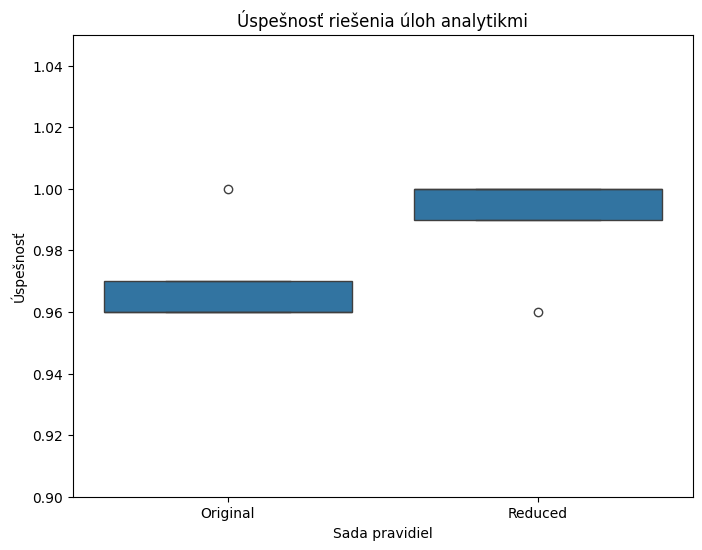

Pôvodná sada pravidiel - Priemerná úspešnosť: 0.97
Pôvodná sada pravidiel - Medián úspešnosti: 0.96

Redukovaná sada pravidiel - Priemerná úspešnosť: 0.99
Redukovaná sada pravidielt - Medián úspešnosti: 1.0


In [102]:
original_success_rate = original_ruleset_answers_success_rate
reduced_success_rate = reduced_ruleset_answers_success_rate

success_rate_data = pd.DataFrame({
    'Category': ['Original'] * len(original_success_rate) + ['Reduced'] * len(reduced_success_rate),
    'SuccessRate': original_success_rate + reduced_success_rate
})

# Box plot for success rates
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y='SuccessRate', data=success_rate_data)
plt.title('Úspešnosť riešenia úloh analytikmi')
plt.xlabel('Sada pravidiel')
plt.ylabel('Úspešnosť')
plt.ylim(0.9, 1.05)  # Set the y-axis to start from 0.9 for better visualization
plt.show()

# Basic statistics for success rates
original_mean = pd.Series(original_success_rate).mean()
reduced_mean = pd.Series(reduced_success_rate).mean()

original_median = pd.Series(original_success_rate).median()
reduced_median = pd.Series(reduced_success_rate).median()

original_std = pd.Series(original_success_rate).std()
reduced_std = pd.Series(reduced_success_rate).std()

print("Pôvodná sada pravidiel - Priemerná úspešnosť:", original_mean)
print("Pôvodná sada pravidiel - Medián úspešnosti:", original_median)

print("\nRedukovaná sada pravidiel - Priemerná úspešnosť:", reduced_mean)
print("Redukovaná sada pravidielt - Medián úspešnosti:", reduced_median)


Okrem samotného času potrebného na vyriešenie zadaných úloh sme vyhodnocovali aj úspešnosť analytikov pri riešení jednotlivých úloh resp. správnosť zadaných odpovedí. Nakoľko však všetci analytici správne yriešili minimálne 24 z 25 zadaných úloh nemožno tu hovoriť o nejakých výrazných rozdieľoch. 

Avšak aj napriek tomu boli anylitici zo skupiny, ktorá mala k dispozícií redukovaný počet upozornení, vo všeobecnosti úspešnejší pri riešení zadaných úloh. Vzhľadom na fakt, že nesprávne zodpovedané otázky sa často medzi jednotlivými analytikmi líšili a teda nebola napríklad v prvej skupine viackrát nesprávne zodpovedaná jedna otázka predpokladáme, že táto mierne vyššia úspešnosť je dôsledkom  redukcie počtu vygenerovaných upozornení.  

## Zhrnutie

Na základe dátovej analýzi údajov zaznamenaných počas CTF experimentov, ktorých cieľom bolo vyhodnotiť vplyv redukcie počtu z bezpečnostného hľadiska nerelevantných upozornení na čas potrebný pre bezpečnostných analytikov na vyhodnotenie daných upozornení možno konštatovať, že redukcia v počte vygenerovaných upozornení má výrazný vplyv na rýchlosť s akou sú chopný analytici získať prehľad o škodlivej aktivite odohrávajúcej sa v monitorovanej sieti.
